# <b> All Models

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import os

df = pd.read_csv(os.path.join('NYPD_Arrest_Data_Clean.csv'))
df2 = pd.read_csv(os.path.join('NYPD_Arrest_Data_Clean_Demographics.csv'))

In [14]:
df

,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,WINTER,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND
0,17,0,105,0,40.737043,-73.735514,1,False,False,False,True,False,False,False,True,False
1,4,0,107,71,40.732881,-73.807899,2,False,False,False,True,False,False,False,True,False
2,17,0,48,0,40.855109,-73.892818,3,False,True,False,False,True,False,False,False,False
3,17,0,121,0,40.628967,-74.163275,5,False,True,False,False,False,False,False,False,True
4,17,0,100,0,40.591980,-73.800066,6,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193605,47,1,109,0,40.757691,-73.834115,9,True,False,False,False,False,False,False,True,False
193606,5,1,34,0,40.856808,-73.928265,9,True,False,False,False,False,False,True,False,False
193607,7,0,23,0,40.786116,-73.942614,9,True,False,False,False,False,False,True,False,False
193608,43,1,44,1,40.827812,-73.925929,9,True,False,False,False,True,False,False,False,False


In [15]:
df2

,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,...,AGE_GROUP_<18,PERP_SEX_F,PERP_SEX_M,PERP_RACE_AMERICAN INDIAN/ALASKAN NATIVE,PERP_RACE_ASIAN / PACIFIC ISLANDER,PERP_RACE_BLACK,PERP_RACE_BLACK HISPANIC,PERP_RACE_UNKNOWN,PERP_RACE_WHITE,PERP_RACE_WHITE HISPANIC
0,17,0,105,0,40.737043,-73.735514,1,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,4,0,107,71,40.732881,-73.807899,2,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,17,0,48,0,40.855109,-73.892818,3,False,True,False,...,False,False,True,False,False,True,False,False,False,False
3,17,0,121,0,40.628967,-74.163275,5,False,True,False,...,False,False,True,False,False,False,False,False,True,False
4,17,0,100,0,40.591980,-73.800066,6,False,False,True,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193605,47,1,109,0,40.757691,-73.834115,9,True,False,False,...,False,False,True,False,False,False,False,False,False,True
193606,5,1,34,0,40.856808,-73.928265,9,True,False,False,...,False,False,True,False,False,False,False,False,False,True
193607,7,0,23,0,40.786116,-73.942614,9,True,False,False,...,False,False,True,False,False,False,False,False,True,False
193608,43,1,44,1,40.827812,-73.925929,9,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='OFFENSE_LEVEL')
y = df['OFFENSE_LEVEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

X2 = df2.drop(columns='OFFENSE_LEVEL')
y2 = df2['OFFENSE_LEVEL']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1234)

# <b> Data without Demographics

In [17]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy_knn}')

Accuracy: 0.9208202055678942


In [18]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

#Best Params: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
dt = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy_dt}')

Accuracy: 0.9285849560112254


In [19]:
# SVM model
from sklearn.svm import SVC

svm_model=SVC() # default kernel is rbf
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy_svm}')

Accuracy: 0.739114715149011


In [20]:
# Linear SVM model
from sklearn.svm import LinearSVC

lin_svm = LinearSVC()
lin_svm.fit(X_train, y_train)
y_pred = lin_svm.predict(X_test)
accuracy_lin_svm = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy_lin_svm}')

Accuracy: 0.461804658850266


In [21]:
# Logistic regression model
# Best Params: {'max_iter': 1000, 'solver': 'liblinear'}
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy_log_reg}')

Accuracy: 0.4572422223370005


In [22]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy_nb}')

Accuracy: 0.5636072516915449


In [23]:
# Random Forest model
# Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy_rf}')

Accuracy: 0.9167398378182945


In [24]:
# Gradient Classifier model
# Best parameters for Gradient Clasifier : {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 300}
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, min_samples_leaf=1, n_estimators=300)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy_gb}')

Accuracy: 0.9309608663464353


In [26]:
# histogram gradient classifier
# Best parameters: {'l2_regularization': 0.1, 'learning_rate': 0.1, 'max_depth': 7}
from sklearn.ensemble import HistGradientBoostingClassifier

hist_gb = HistGradientBoostingClassifier(l2_regularization=0.1, learning_rate=0.1, max_depth=7)
hist_gb.fit(X_train, y_train)
y_pred = hist_gb.predict(X_test)
accuracy_hist_gb = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy_hist_gb}')

Accuracy: 0.9313568514023036


In [27]:
# Baggging Classifier model
# Best parameters: {'max_samples': 0.5, 'n_estimators': 400}
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(max_samples=0.5, n_estimators=400)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
accuracy_bag = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy_bag}')

Accuracy: 0.9339910128609059


In [28]:
# XGBoost Classifier model
# Best parameters: {'max_depth': 4, 'n_estimators': 300}
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=4, n_estimators=300)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy_xgb}')

Accuracy: 0.9308919993801973


# <b> Data with Demographics

In [29]:
# KNN model

knn2 = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan')
knn2.fit(X_train2, y_train2)
y_pred2 = knn2.predict(X_test2)
accuracy_knn2 = accuracy_score(y_test2, y_pred2)

print(f'Accuracy: {accuracy_knn2}')

Accuracy: 0.9039994490642701


In [30]:
# DT model
#Best Params: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=10)
dt2.fit(X_train2, y_train2)
y_pred2 = dt2.predict(X_test2)
accuracy_dt2 = accuracy_score(y_test2, y_pred2)

print(f'Accuracy: {accuracy_dt2}')

Accuracy: 0.9272937003942634


In [31]:
# SVM model

model2=SVC() # default kernel is rbf
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)
accuracy_svm2 = accuracy_score(y_test2, y_pred2)

print(f'Accuracy: {accuracy_svm2}')

Accuracy: 0.7391663653736894


In [32]:
# linear SVM model

lin_svm2 = LinearSVC()
lin_svm2.fit(X_train2, y_train2)
y_pred2 = lin_svm2.predict(X_test2)
accuracy_lin_svm2 = accuracy_score(y_test2, y_pred2)

print(f'Accuracy: {accuracy_lin_svm2}')

Accuracy: 0.5534838076545633


In [33]:
# Logistic Regression model
# Best Params: {'max_iter': 1000, 'solver': 'liblinear'}
log_reg2 = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg2.fit(X_train2, y_train2)
y_pred2 = log_reg2.predict(X_test2)
accuracy_log_reg2 = accuracy_score(y_test2, y_pred2)

print(f'Accuracy: {accuracy_log_reg2}')

Accuracy: 0.5535010243961228


In [34]:
# Naive Bayes Model, Bernoulli
nb2 = BernoulliNB()
nb2.fit(X_train2, y_train2)
y_pred2 = nb2.predict(X_test2)
accuracy_nb2 = accuracy_score(y_test2, y_pred2)

print(f'Accuracy: {accuracy_nb2}')

Accuracy: 0.5912401218945302


In [35]:
# random forest model
# Best parameters for Random Forest: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
rf2 = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=300)
rf2.fit(X_train2, y_train2)
y_pred2 = rf2.predict(X_test2)
accuracy_rf2 = accuracy_score(y_test2, y_pred2)

print(f'Accuracy: {accuracy_rf2}')


Accuracy: 0.9078732159151559


In [36]:
# gradient classifier model
# Best parameters for Gradient Classifier: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 300}
gb2 = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, min_samples_leaf=4, n_estimators=300)
gb2.fit(X_train2, y_train2)
y_pred2 = gb2.predict(X_test2)
accuracy_gb2 = accuracy_score(y_test2, y_pred2)

print(f'Accuracy: {accuracy_gb2}')

Accuracy: 0.9348346331973211


In [37]:
# histogram gradient classifier
# Best parameters: {'l2_regularization': 0.1, 'learning_rate': 0.1, 'max_depth': 7}
hist_gb2 = HistGradientBoostingClassifier(l2_regularization=0.1, learning_rate=0.1, max_depth=7)
hist_gb2.fit(X_train2, y_train2)
y_pred2 = hist_gb2.predict(X_test2)
accuracy_hist_gb2 = accuracy_score(y_test2, y_pred2)

print(f'Accuracy: {accuracy_hist_gb2}')

Accuracy: 0.9341976137596198


In [38]:
# Bagging Classifier model
# Best parameters: {'max_samples': 0.5, 'n_estimators': 400}
bag2 = BaggingClassifier(max_samples=0.5, n_estimators=400)
bag2.fit(X_train2, y_train2)
y_pred2 = bag2.predict(X_test2)
accuracy_bag2 = accuracy_score(y_test2, y_pred2)

print(f'Accuracy: {accuracy_bag2}')

Accuracy: 0.9341287467933819


In [40]:
# Clean feature names
X_train2.columns = X_train2.columns.str.replace('[', '', regex=False).str.replace(']', '', regex=False).str.replace('<', '', regex=False).str.replace('>', '', regex=False)
X_test2.columns = X_test2.columns.str.replace('[', '', regex=False).str.replace(']', '', regex=False).str.replace('<', '', regex=False).str.replace('>', '', regex=False)

# Run XGBoost on
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb2 = XGBClassifier(max_depth=5, n_estimators=200)
xgb2.fit(X_train2, y_train2)
y_pred2 = xgb2.predict(X_test2)

accuracy_xgb2 = accuracy_score(y_test2, y_pred2)
print(f'Accuracy: {accuracy_xgb2}')

Accuracy: 0.934025446344025


# <b> Graphs

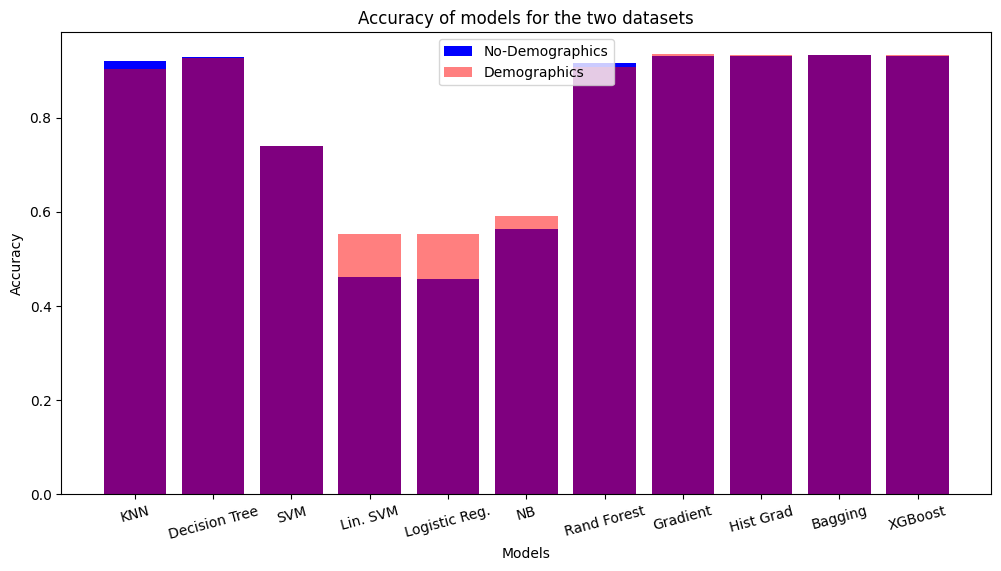

In [55]:
# plot the accuracy of the models for the two datasets
models = ['KNN', 'Decision Tree', 'SVM', 'Lin. SVM', 'Logistic Reg.', 'NB', 'Rand Forest', 'Gradient', 'Hist Grad', 'Bagging', 'XGBoost']
accuracy = [accuracy_knn, accuracy_dt, accuracy_svm, accuracy_lin_svm, accuracy_log_reg, accuracy_nb, accuracy_rf, accuracy_gb, accuracy_hist_gb, accuracy_bag, accuracy_xgb]
accuracy2 = [accuracy_knn2, accuracy_dt2, accuracy_svm2, accuracy_lin_svm2, accuracy_log_reg2, accuracy_nb2, accuracy_rf2, accuracy_gb2, accuracy_hist_gb2, accuracy_bag2, accuracy_xgb2]

plt.figure(figsize=(12, 6))
plt.bar(models, accuracy, color='blue', label='No-Demographics')
plt.bar(models, accuracy2, color='red', alpha=0.5, label='Demographics')
plt.xticks(rotation=15)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of models for the two datasets')
plt.legend()
plt.show()


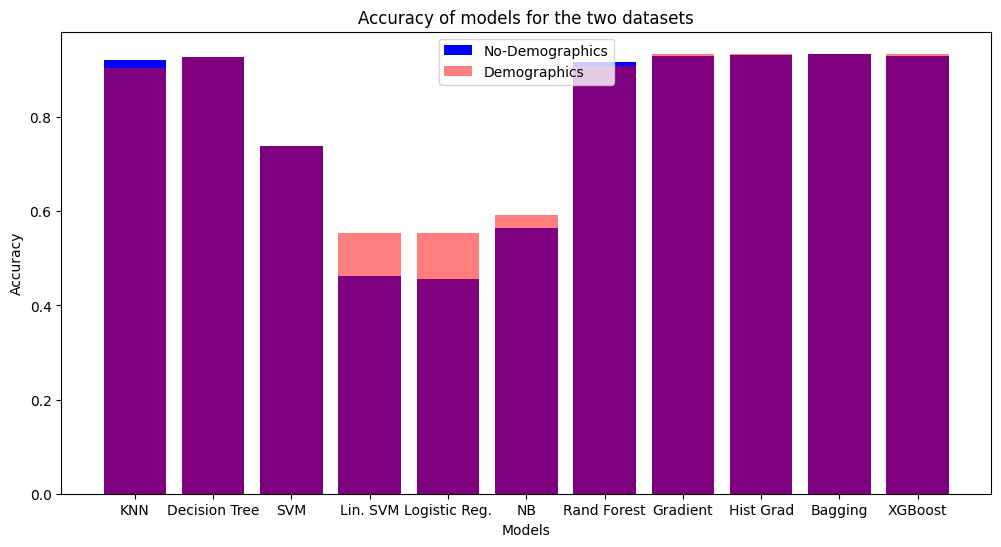

In [56]:
# plot the accuracy of the models for the two datasets side by side
plt.figure(figsize=(12, 6))
plt.bar(models, accuracy, color='blue', label='No-Demographics')
plt.bar(models, accuracy2, color='red', alpha=0.5, label='Demographics')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of models for the two datasets')
plt.legend()
plt.show()


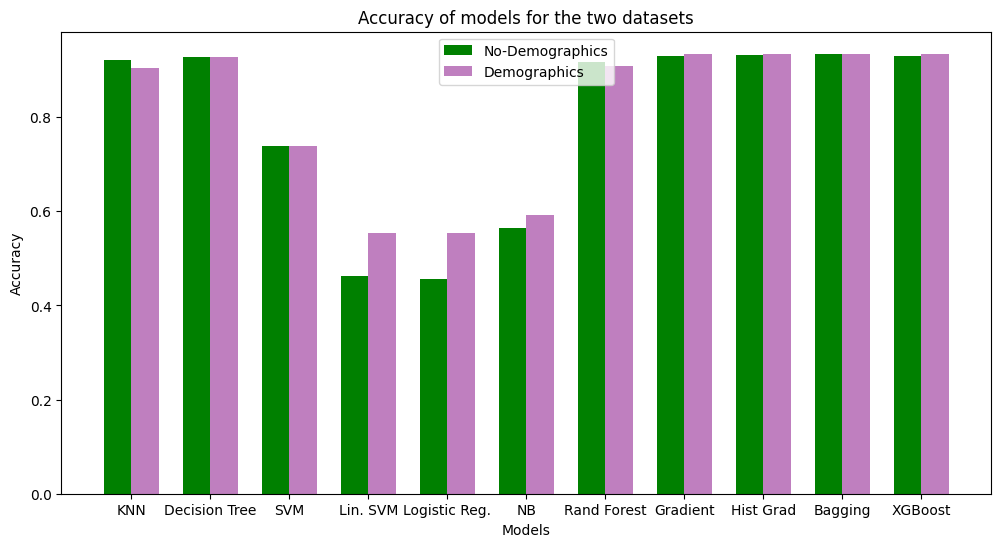

In [59]:
# Number of models
n = len(models)

# Positions of the bars on the x-axis
ind = np.arange(n)

# Width of a bar
width = 0.35

# Plotting the bars
plt.figure(figsize=(12, 6))
plt.bar(ind, accuracy, width, color='green', label='No-Demographics')
plt.bar(ind + width, accuracy2, width, color='purple', alpha=0.5, label='Demographics')

# Adding labels
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of models for the two datasets')
plt.xticks(ind + width / 2, models)
plt.legend()

# Show the plot
plt.show()

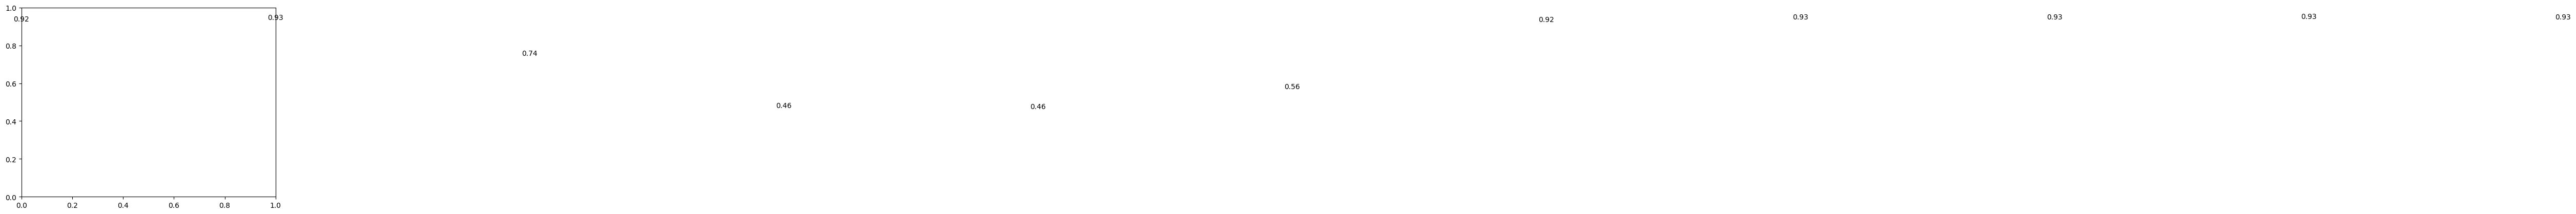

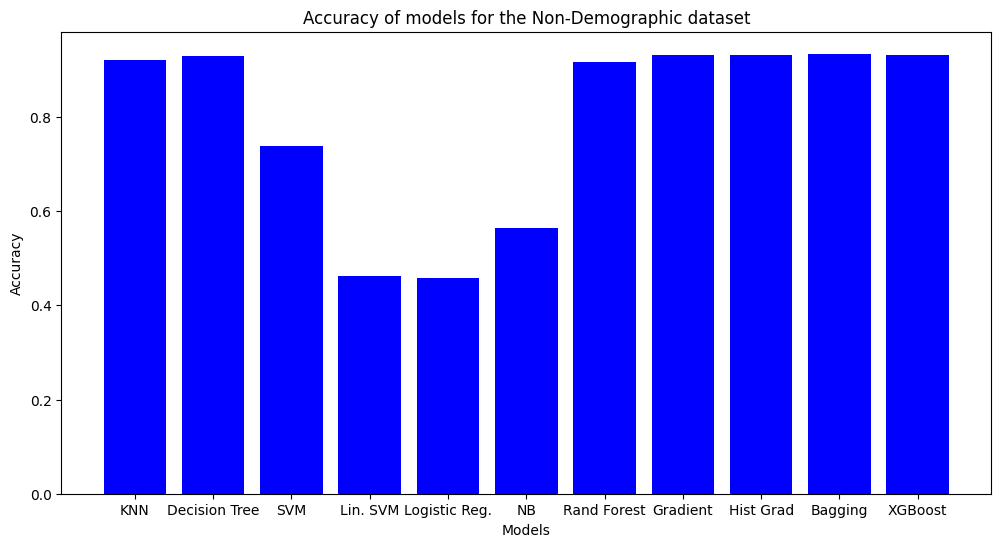

In [53]:
# plot the accuracy of the models for the Non-Demographic dataset
models = ['KNN', 'Decision Tree', 'SVM', 'Lin. SVM', 'Logistic Reg.', 'NB', 'Rand Forest', 'Gradient', 'Hist Grad', 'Bagging', 'XGBoost']
accuracy = [accuracy_knn, accuracy_dt, accuracy_svm, accuracy_lin_svm, accuracy_log_reg, accuracy_nb, accuracy_rf, accuracy_gb, accuracy_hist_gb, accuracy_bag, accuracy_xgb]
# add the accuracy of the models at the top of the bars
for i in range(len(models)):
    plt.text(i, accuracy[i], f'{accuracy[i]:.2f}', ha='center', va='bottom')
    
plt.figure(figsize=(12, 6))
plt.bar(models, accuracy, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of models for the Non-Demographic dataset')
plt.show()

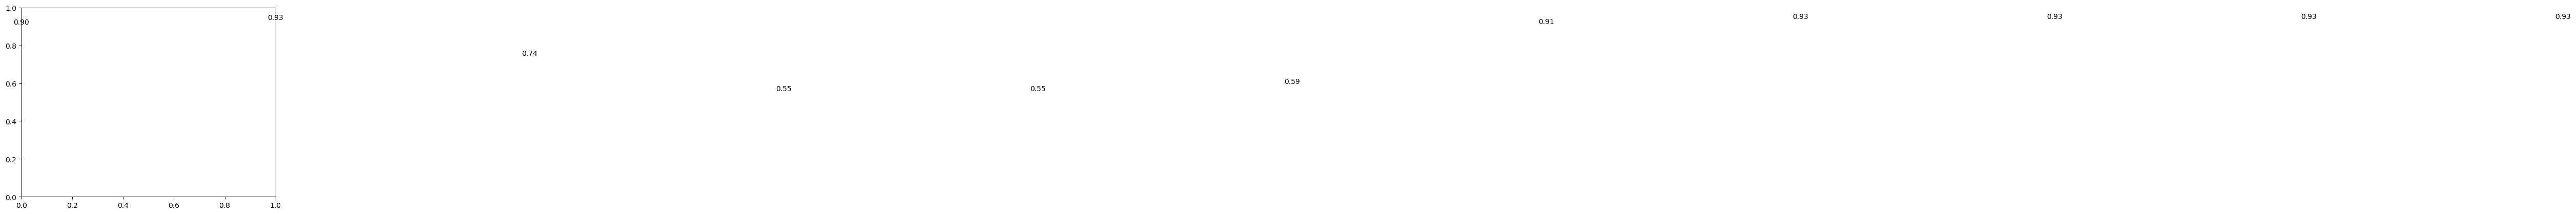

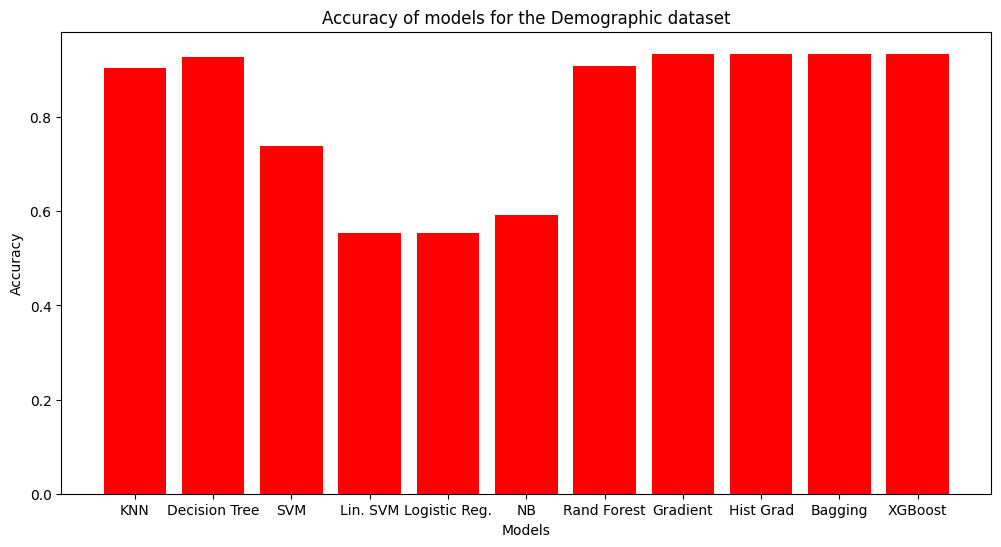

In [52]:
# plot the accuracy of the models for the Demographic dataset
models = ['KNN', 'Decision Tree', 'SVM', 'Lin. SVM', 'Logistic Reg.', 'NB', 'Rand Forest', 'Gradient', 'Hist Grad', 'Bagging', 'XGBoost']
accuracy2 = [accuracy_knn2, accuracy_dt2, accuracy_svm2, accuracy_lin_svm2, accuracy_log_reg2, accuracy_nb2, accuracy_rf2, accuracy_gb2, accuracy_hist_gb2, accuracy_bag2, accuracy_xgb2]
# add the accuracy of the models at the top of the bars
for i in range(len(models)):
    plt.text(i, accuracy2[i], f'{accuracy2[i]:.2f}', ha='center', va='bottom')

plt.figure(figsize=(12, 6))
plt.bar(models, accuracy2, color='red')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of models for the Demographic dataset')
plt.show()

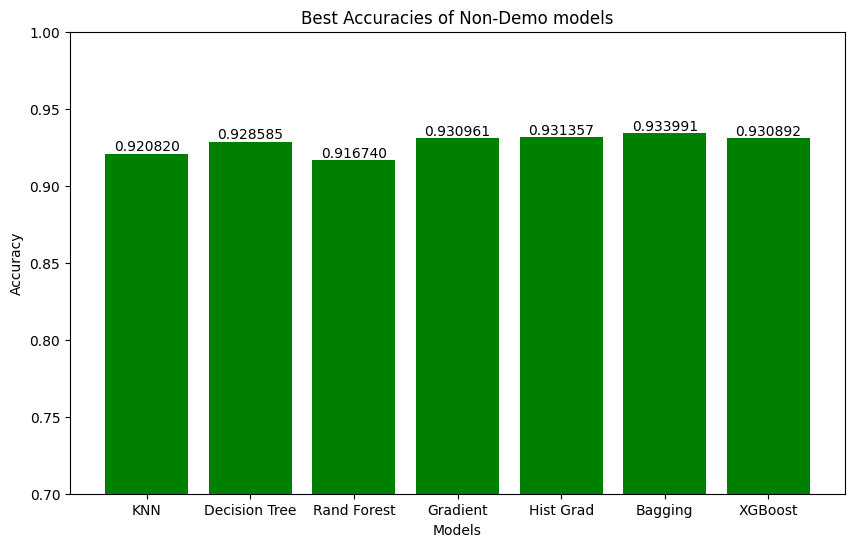

In [66]:
# look at the models with 0.8 accuracy or higher
better_models = ['KNN', 'Decision Tree', 'Rand Forest', 'Gradient', 'Hist Grad', 'Bagging', 'XGBoost']
better_accuracy = [accuracy_knn, accuracy_dt, accuracy_rf, accuracy_gb, accuracy_hist_gb, accuracy_bag, accuracy_xgb]

plt.figure(figsize=(10, 6))
plt.bar(better_models, better_accuracy, color='green')
plt.xlabel('Models')
plt.ylim(0.7, 1)
# include the accuracy on top of the bars
for i in range(len(better_models)):
    plt.text(i, better_accuracy[i], f'{better_accuracy[i]:.6f}', ha='center', va='bottom')
plt.ylabel('Accuracy')
plt.title('Best Accuracies of Non-Demo models')
plt.show()


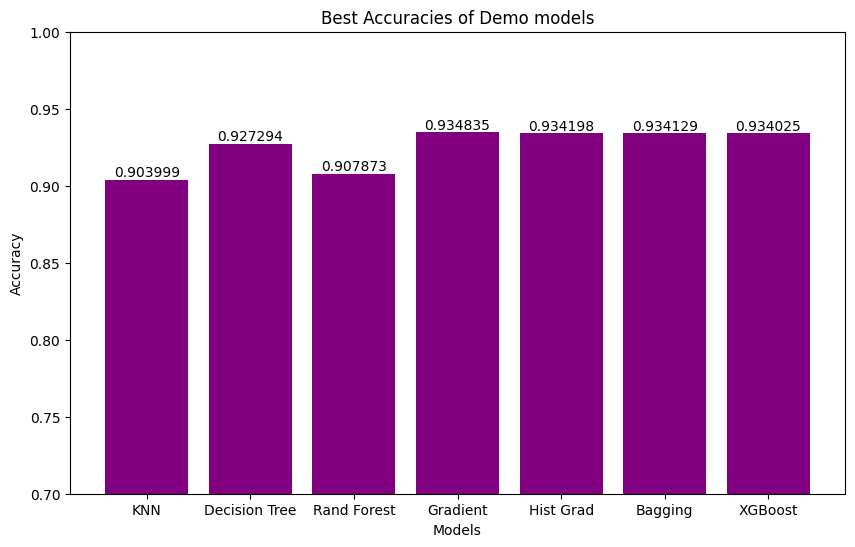

In [67]:
# do the same for the demographic dataset
better_models2 = ['KNN', 'Decision Tree', 'Rand Forest', 'Gradient', 'Hist Grad', 'Bagging', 'XGBoost']
better_accuracy2 = [accuracy_knn2, accuracy_dt2, accuracy_rf2, accuracy_gb2, accuracy_hist_gb2, accuracy_bag2, accuracy_xgb2]

plt.figure(figsize=(10, 6))
plt.bar(better_models2, better_accuracy2, color='purple')
plt.xlabel('Models')
plt.ylim(0.7, 1)
# include the accuracy on top of the bars
for i in range(len(better_models2)):
    plt.text(i, better_accuracy2[i], f'{better_accuracy2[i]:.6f}', ha='center', va='bottom')
plt.ylabel('Accuracy')
plt.title('Best Accuracies of Demo models')
plt.show()

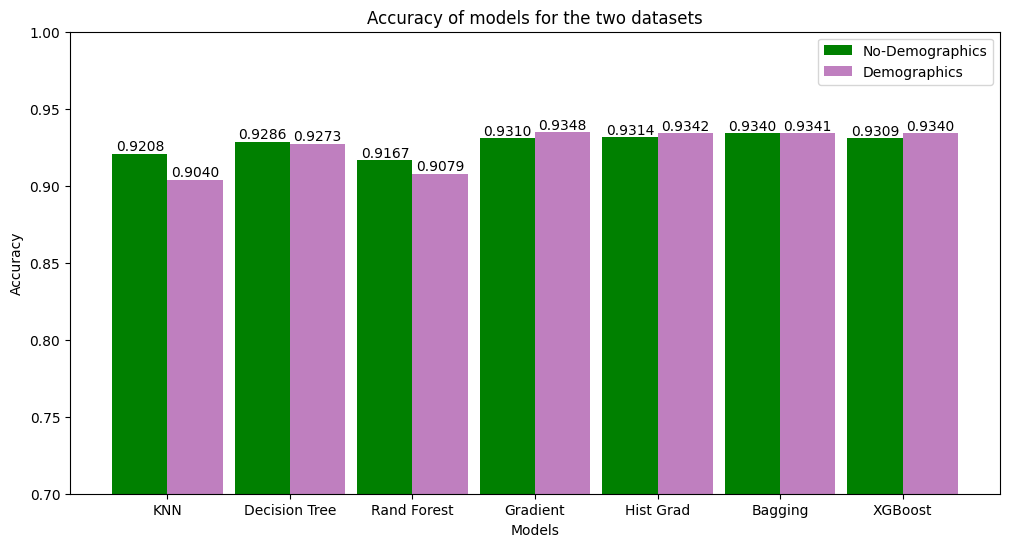

In [76]:
# Number of models
n = len(better_models)

# Positions of the bars on the x-axis
ind = np.arange(n)

# Width of a bar
width = 0.45

# Plotting the bars
plt.figure(figsize=(12, 6))
plt.bar(ind, better_accuracy, width, color='green', label='No-Demographics')
plt.bar(ind + width, better_accuracy2, width, color='purple', alpha=0.5, label='Demographics')

# Adding labels
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1)
plt.title('Accuracy of models for the two datasets')
plt.xticks(ind + width / 2, better_models)
plt.legend()

# Show the plot
# add the accuracy of the models at the top of the bars
for i in range(len(better_models)):
    plt.text(i, better_accuracy[i], f'{better_accuracy[i]:.4f}', ha='center', va='bottom')
    plt.text(i + width, better_accuracy2[i], f'{better_accuracy2[i]:.4f}', ha='center', va='bottom')

plt.show()